Price Prediction on single competitor over 30 day time span and 180 days

In [ ]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor



Source Data from Commercial webscraping application for a single competitor's rates over 180 days

In [49]:
data = pd.read_csv('Pricemaster.csv')

data.head(5)


,D_Predict,180,177,174,171,168,165,162,159,156,...,57,54,51,48,45,42,39,36,33,30
0,1,845,845,845,845,845,902,902,"1,256","1,256",...,949,949,949,949,845,845,845,845,845,845
1,2,645,645,645,645,645,745,745,902,902,...,788,788,645,645,645,645,645,645,645,645
2,3,795,795,795,795,795,795,795,795,795,...,795,795,795,795,795,795,795,795,795,795
3,4,645,645,645,645,645,645,645,645,645,...,745,745,745,645,645,645,645,645,645,645
4,5,645,645,645,645,645,645,645,645,645,...,645,645,645,645,645,645,645,645,645,645


Transform data for cleaner handling in Tableau & ML
Reclassed date field to numeric for ease of future use and day of month correlation

In [3]:
melt = data.melt(id_vars='D_Predict', var_name='DTA', value_name='Nightly_Price')

melt = melt.sort_values(['DTA', 'D_Predict'])
melt.head()


,D_Predict,DTA,Nightly_Price
780,1,102,745
781,2,102,745
782,3,102,795
783,4,102,845
784,5,102,680


In [5]:
export_csv = melt.to_csv (r'C:\Users\nicol\pythondir\FinalProject\export_dataframe3.csv', index = None, header=True) 


Added one Variable - Market which is a marker of the stregnth or weakenss of demand for a given day

In [6]:
data2 = pd.read_csv('export_dataframe2.csv')

data2.head()

,D_Predict,DTA,Nightly_Price,Market
0,1,30,845.0,82.166802
1,2,30,645.0,59.080892
2,3,30,795.0,57.728296
3,4,30,645.0,61.618894
4,5,30,645.0,61.197763


In [7]:
data2['Nightly_Price'] = data2['Nightly_Price'].astype(float)
data2['Market'] = data2['Market'].astype(float)
data2['D_Predict'] = data2['D_Predict'].astype(float)
data2['D_Predict'] = data2['D_Predict'].astype(float)


In [8]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

Visualize distribution of data within the set - notice outlier data (high and low) 

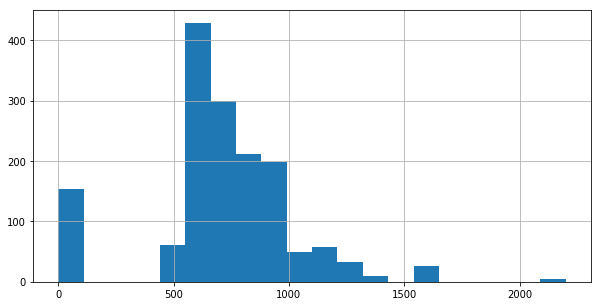

In [9]:
data2['Nightly_Price'].hist(bins=20, figsize=(10,5))

In [11]:
#Here we are shaping our data
X = data2['DTA'].values.reshape(-1, 1)
y = data2['Nightly_Price'].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1530, 1) (1530, 1)


Text(0, 0.5, 'Nightly_Price')

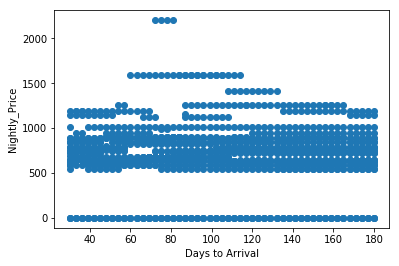

In [17]:
plt.scatter(X, y)
plt.xlabel("Days to Arrival")
plt.ylabel("Nightly_Price")

Training Set, Scaling & Model construction

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\nicol\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\nicol\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\nicol\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


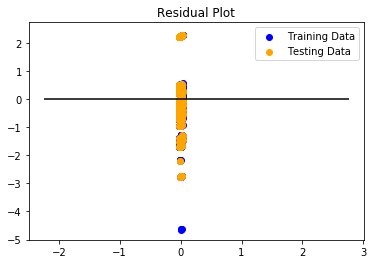

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

For the model a Random Forest Regressor was chosen due to the limited size of our sample set and stability

[778.99317247 681.61081575 730.34468196 672.88328784 764.54677833
 738.29578905 669.97227722 716.2603797  672.88328784 746.39240774
 767.17097163 749.04974509 657.71839745 716.2603797  767.9385045
 674.42875594 696.04239447 666.19326489 666.19326489 694.90976531
 730.34468196 734.30390409 668.56090519 658.43352549 778.99317247
 681.61081575 696.04239447 718.23269397 767.17097163 696.95628913
 767.17097163 696.95628913 696.04239447 764.54677833 700.61498045
 696.95628913 741.42850643 688.33781649 746.39240774 741.42850643
 749.04974509 704.13813408 740.7223736  741.42850643 734.30390409
 694.90976531 666.19326489 664.91725837 753.41721793 746.39240774
 694.90976531 669.97227722 696.04239447 767.17097163 746.39240774
 733.89278214 666.19326489 733.89278214 734.30390409 745.85060147
 730.34468196 754.48714609 684.82843093 764.54677833 688.33781649
 733.89278214 754.48714609 669.97227722 669.97227722 723.15349214
 696.04239447 695.22081648 695.22081648 696.04239447 724.42781593
 738.295789

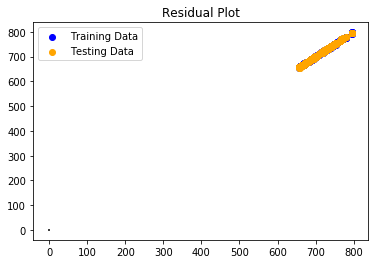

In [50]:
error = []
for DTA in range(30):
    forest = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=5)
    model= forest.fit(X_train_scaled, y_train.ravel())
    predictions = model.predict(X_test_scaled)
    MSE = mean_squared_error(y_test_scaled, predictions)
    error.append(MSE)

print(predictions)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled.ravel(), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled.ravel(), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


Package, export & Save predictions & Results

In [51]:
df_predicts = pd.DataFrame(predictions)
df_predicts.columns = ['Predictions']
df_predicts.rename(index={0:'06-01',  1: '06-02',  2: '06-03',  3: '06-04',  4: '06-05',  5: '06-06',  6: '06-07',  7: '06-08',  8: '06-09', 
                          9:'06-10', 10: '06-11', 11: '06-12', 12: '06-13', 13: '06-14', 14: '06-15', 15: '06-16', 16: '06-17', 17: '06-18', 18:'06-19', 19:'06-20', 20:'06-21',
                         21:'06-22', 22: '06-23', 23: '06-24', 24: '06-25', 25: '06-26', 26: '06-27', 27: '06-28', 28: '06-29', 29: '06-30' }, inplace=True)
df_predicts.head()

,Predictions
06-01,778.993172
06-02,681.610816
06-03,730.344682
06-04,672.883288
06-05,764.546778


In [53]:
exportpredicts_csv = df_predicts.to_csv (r'C:\Users\nicol\pythondir\FinalProject\exportpredicts2_dataframe.csv', index = None, header=True) 

In [61]:
pkl_pricepredict = "pickle_model.pkl"
with open(pkl_pricepredict, 'wb') as file:
    pickle.dump(model, file)

In [62]:
with open(pkl_pricepredict, 'rb') as file:
    pickle_model = pickle.load(file)